In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import broyden1

In [17]:
U_aus=np.array([2.472,2.740,3.010,3.305,3.579])
U_aus_Fehler=np.array([0.01,0.01,0.011,0.014,0.014])
T=np.array([50.22,100.83,150.87,201.58,249.87])+273.15
Widerstand=np.array([4779.3,5553,6306,7504.4,7762.1])
U_V=1.362
Fehler_U_V=0.005
F=(U_aus**2-U_V**2)/Widerstand
Fehler_F=1/Widerstand*(np.sqrt((2*U_aus*U_aus_Fehler)**2-(U_V*2*Fehler_U_V)**2))

<ErrorbarContainer object of 3 artists>

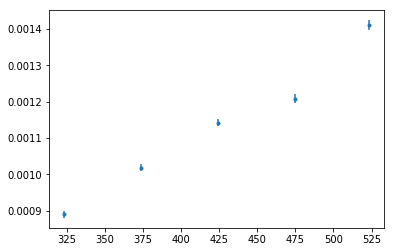

In [18]:
plt.errorbar(T,F,yerr=Fehler_F,fmt='.')

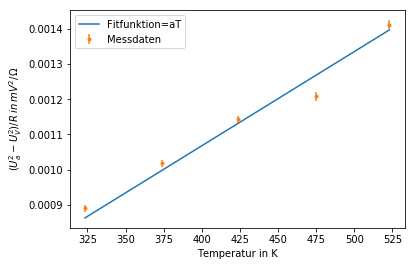

In [19]:
def linear(x,c):
    return(c*x)
popt, pcov = curve_fit(linear,T,F)
plt.plot (T,linear(T,popt[0]),label='Fitfunktion=aT')
plt.errorbar(T,F,yerr=Fehler_F, fmt='.',label='Messdaten')
plt.xlabel('Temperatur in K')
plt.ylabel('$(U_a^2-U_V^2)/R \: in \:  mV^2/\Omega $')
plt.legend(loc='best')

In [20]:
chisquare=np.sum(((linear(T,*popt)-F)**2/Fehler_F**2))
dof=5 #Freiheitsgrade
chisquare_red=chisquare/dof
print('Chi^2='+str(chisquare))
print('Chi^2_R='+str(chisquare_red))
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print("Wahrscheinlichkeit="+str(prob)+"%")#
print(popt[0])
print(np.sqrt(pcov[0,0]))

Chi^2=37.41461939070647
Chi^2_R=7.482923878141294
Wahrscheinlichkeit=0.0%
2.6700737567273114e-06
3.656616639341397e-08


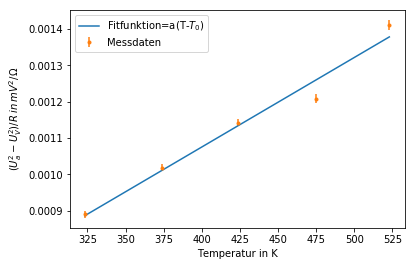

In [21]:
def linear_parttwo(y,d,h):
    return(d*(y-h)) 
p0=[0.00000067068,0]
popt2, pcov2 = curve_fit(linear_parttwo,T,F,p0)
plt.plot (T,linear_parttwo(T,*popt2),label='Fitfunktion=a(T-$T_0$)')
plt.errorbar(T,F,yerr=Fehler_F, fmt='.',label='Messdaten')
plt.xlabel('Temperatur in K')
plt.ylabel('$(U_a^2-U_V^2)/R \: in \:  mV^2/\Omega $')
plt.legend(loc='best')


In [26]:
print(popt2[0])
print(np.sqrt(pcov2[0,0]))
Tnull=broyden1(linear_parttwo,-274)
print(Tnull)

2.4608904109459183e-06
2.254340615393918e-07


TypeError: linear_parttwo() missing 2 required positional arguments: 'd' and 'h'